In [10]:
%pip install gensim transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **TF IDF**

In [11]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    RocCurveDisplay,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.model_selection import cross_val_score, train_test_split

In [12]:
sns.set()
plt.rcParams["figure.dpi"] = 120

In [13]:
metrics = dict(accuracy=dict(), f1=dict(), cmat=dict(), roc=dict(), auc=dict(), precision=dict(), recall=dict())

In [14]:
df = pd.read_csv("labeled_data.csv")
print(df["Content"])

0       nhân viên quá tệ không tư vấn khách hàng các m...
1                    mua máy người bảo có người bảo không
2       nhân viên tư vấn vô lễ vô giáo dục chửi khách ...
3       thất vọng tràn trề từ sale đến kỹ thuật đến cả...
4       lúc sau lại đổ cho dòng máy này nó more nhưng ...
                              ...                        
6461                                  xóa tải lại mất hết
6462    xóa tải lại mất hết điểm tiền và không dữ liệu...
6463                             xoá xong tải lại mất hết
6464                             xong lỗi không chơi được
6465                   xong mất hết chia khoa ngu PROFANE
Name: Content, Length: 6466, dtype: object


In [15]:
vectorizer_pos = TfidfVectorizer()
X = vectorizer_pos.fit_transform(df["Content"])
vectorizer_pos.get_feature_names_out()

array(['about', 'ac', 'accept', ..., 'ủy', 'ức', 'ứng'], dtype=object)

In [16]:
y = np.array(df["Label"])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
svc = svm.SVC(kernel="rbf", C=1).fit(X_train, y_train)
y_pred = svc.predict(X_test)

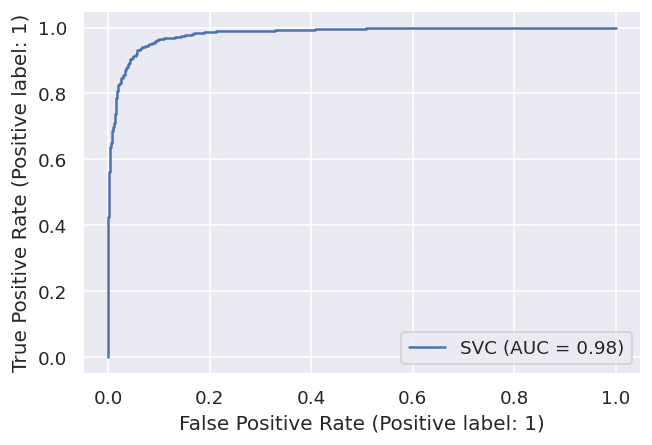

In [18]:
metrics["cmat"]["tf-idf"] = confusion_matrix(y_test, y_pred, normalize="true")
metrics["accuracy"]["tf-idf"] = accuracy_score(y_test, y_pred)
metrics["f1"]["tf-idf"] = f1_score(y_test, y_pred, average="macro")
metrics["auc"]["tf-idf"] = roc_auc_score(y_test, y_pred)
metrics["precision"]["tf-idf"] = precision_score(y_test, y_pred, average="macro")
metrics["recall"]["tf-idf"] = recall_score(y_test, y_pred)

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
metrics["roc"]["tf-idf"] = svc_disp

### **FastText**

In [19]:
from gensim.models import FastText
from gensim.test.utils import common_texts  # some example sentences
from gensim.test.utils import datapath

In [20]:
df["tokens"] = df["Content"].str.split()

In [21]:
model = FastText(size=100, window=3, min_count=1, sentences=df["tokens"])

In [22]:
# https://stackoverflow.com/questions/54181163/fasttext-embeddings-sentence-vectors
def l2_norm(x):
    return np.sqrt(np.sum(x**2))


def div_norm(x):
    norm_value = l2_norm(x)
    if norm_value > 0:
        return x * (1.0 / norm_value)
    else:
        return x

In [23]:
def convert_to_vector(sent):
    X = model.wv[sent]
    X_new = np.apply_along_axis(div_norm, axis=0, arr=X)
    return X_new.mean(axis=0)

In [24]:
df["X"] = df["tokens"].apply(convert_to_vector)

In [25]:
X = np.vstack(df["X"])
y = np.array(df["Label"])
X

array([[ 0.26385686, -0.2626208 ,  0.26433408, ...,  0.25666478,
         0.26329747,  0.26180834],
       [ 0.3513732 , -0.35229737,  0.35256085, ...,  0.35301906,
         0.35251638,  0.35183153],
       [ 0.18164016, -0.18099973,  0.18218003, ...,  0.1749366 ,
         0.18197027,  0.18066074],
       ...,
       [ 0.39573216, -0.3963817 ,  0.3960315 , ...,  0.38807532,
         0.39555356,  0.39657828],
       [ 0.44700497, -0.44563073,  0.4467143 , ...,  0.44641876,
         0.44654864,  0.44636068],
       [ 0.3719522 , -0.37092796,  0.37171438, ...,  0.37129322,
         0.3718458 ,  0.371407  ]], dtype=float32)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
svc = svm.SVC(kernel="rbf", C=1).fit(X_train, y_train)
y_pred = svc.predict(X_test)

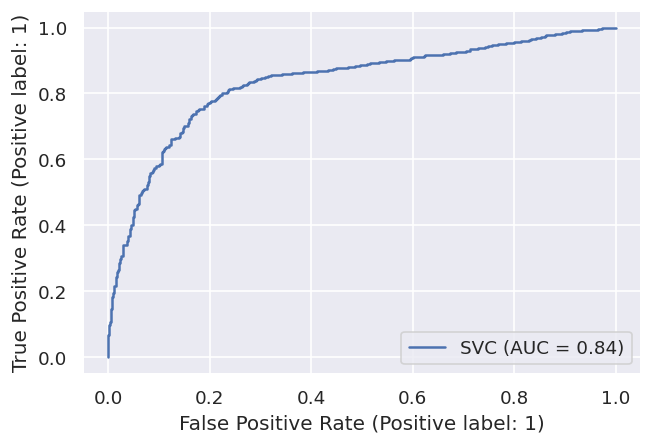

In [28]:
metrics["cmat"]["fasttext"] = confusion_matrix(y_test, y_pred, normalize="true")
metrics["accuracy"]["fasttext"] = accuracy_score(y_test, y_pred)
metrics["f1"]["fasttext"] = f1_score(y_test, y_pred, average="macro")
metrics["auc"]["fasttext"] = roc_auc_score(y_test, y_pred)
metrics["precision"]["fasttext"] = precision_score(y_test, y_pred, average="macro")
metrics["recall"]["fasttext"] = recall_score(y_test, y_pred)

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
metrics["roc"]["fasttext"] = svc_disp

# **PhoBert**

In [29]:
df = pd.read_csv("labeled_data.csv")
print(df["Content"])

0       nhân viên quá tệ không tư vấn khách hàng các m...
1                    mua máy người bảo có người bảo không
2       nhân viên tư vấn vô lễ vô giáo dục chửi khách ...
3       thất vọng tràn trề từ sale đến kỹ thuật đến cả...
4       lúc sau lại đổ cho dòng máy này nó more nhưng ...
                              ...                        
6461                                  xóa tải lại mất hết
6462    xóa tải lại mất hết điểm tiền và không dữ liệu...
6463                             xoá xong tải lại mất hết
6464                             xong lỗi không chơi được
6465                   xong mất hết chia khoa ngu PROFANE
Name: Content, Length: 6466, dtype: object


In [30]:
import torch

from transformers import AutoTokenizer, RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained(
    "wonrax/phobert-base-vietnamese-sentiment"
)

tokenizer = AutoTokenizer.from_pretrained(
    "wonrax/phobert-base-vietnamese-sentiment", use_fast=False
)

In [31]:
y = np.array(df["Label"])
y

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
X = tokenizer(df["Content"].to_list(), padding='max_length', max_length=256)

In [33]:
X = torch.Tensor(X["input_ids"]).int()

In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [35]:
model = model.to(device)
X = X.to(device)

Predict hết dataset sẽ làm colab tràn RAM nên ta phải chia nhỏ thành nhiều batch

In [36]:
batch_idx = np.array_split(range(X.shape[0]), 20)
out = []

In [37]:
with torch.no_grad():
    for batch in tqdm(batch_idx):
        X_b = X[batch, :]
        y_b = model(X_b)
        out.append(y_b)

100%|██████████| 20/20 [01:17<00:00,  3.89s/it]


In [38]:
y_pred = torch.concat([*map(lambda x: x.logits, out)])

Thứ tự của 3 cột là NEG, POS, NEUTRAL. Vì ta không cần NEUTRAL nên ta sẽ bỏ cột số 3 đi

In [39]:
y_pred = y_pred[:, [0, 1]]

In [40]:
y_pred = torch.argmax(y_pred, axis=1)
y_pred = y_pred.cpu().detach().numpy()

In [41]:
metrics["cmat"]["phobert"] = confusion_matrix(y, y_pred, normalize="true")
metrics["accuracy"]["phobert"] = accuracy_score(y, y_pred)
metrics["f1"]["phobert"] = f1_score(y, y_pred, average="macro")
metrics["auc"]["phobert"] = roc_auc_score(y, y_pred)
metrics["precision"]["phobert"] = precision_score(y, y_pred, average="macro")
metrics["recall"]["phobert"] = recall_score(y, y_pred)

# So sánh kết quả

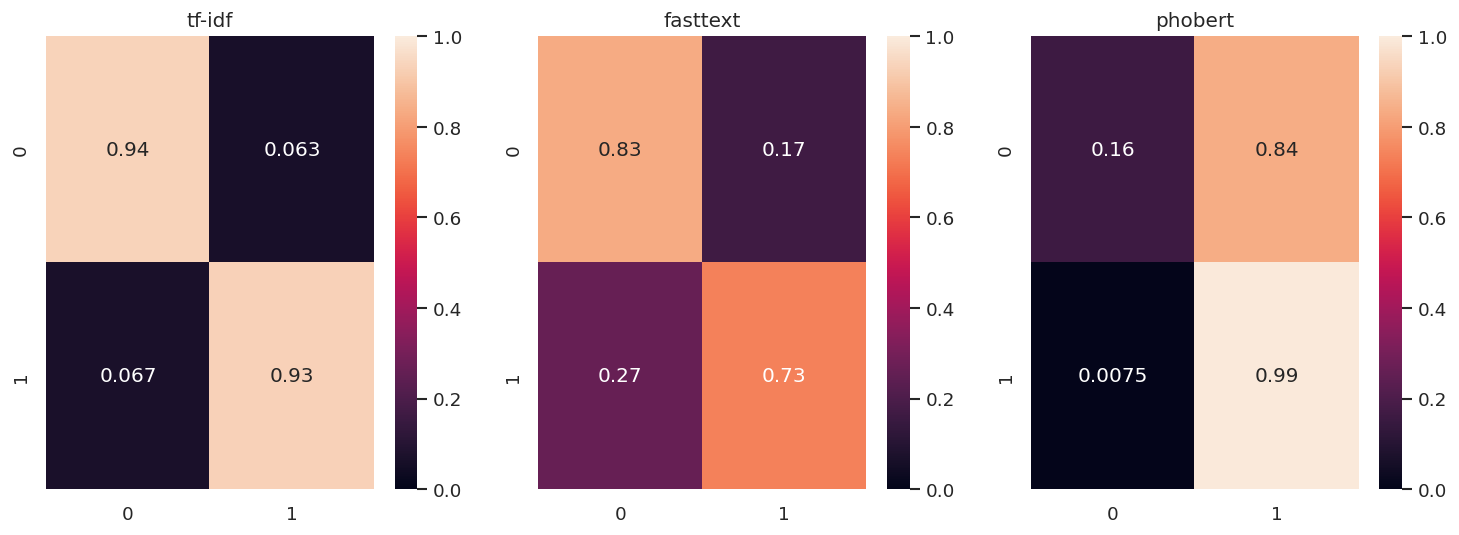

In [42]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
for model, ax in zip(metrics["cmat"], axes):
    ax.set_title(model)
    sns.heatmap(metrics["cmat"][model], ax=ax, vmin=0, vmax=1, annot=True)

In [43]:
def plot_metrics(metric_name, ax):
  ax.set_title(metric_name)
  sns.barplot(x=list(metrics[metric_name].keys()), y=list(metrics[metric_name].values()), ax=ax)
  ax.set_ylim(0.4, 1)

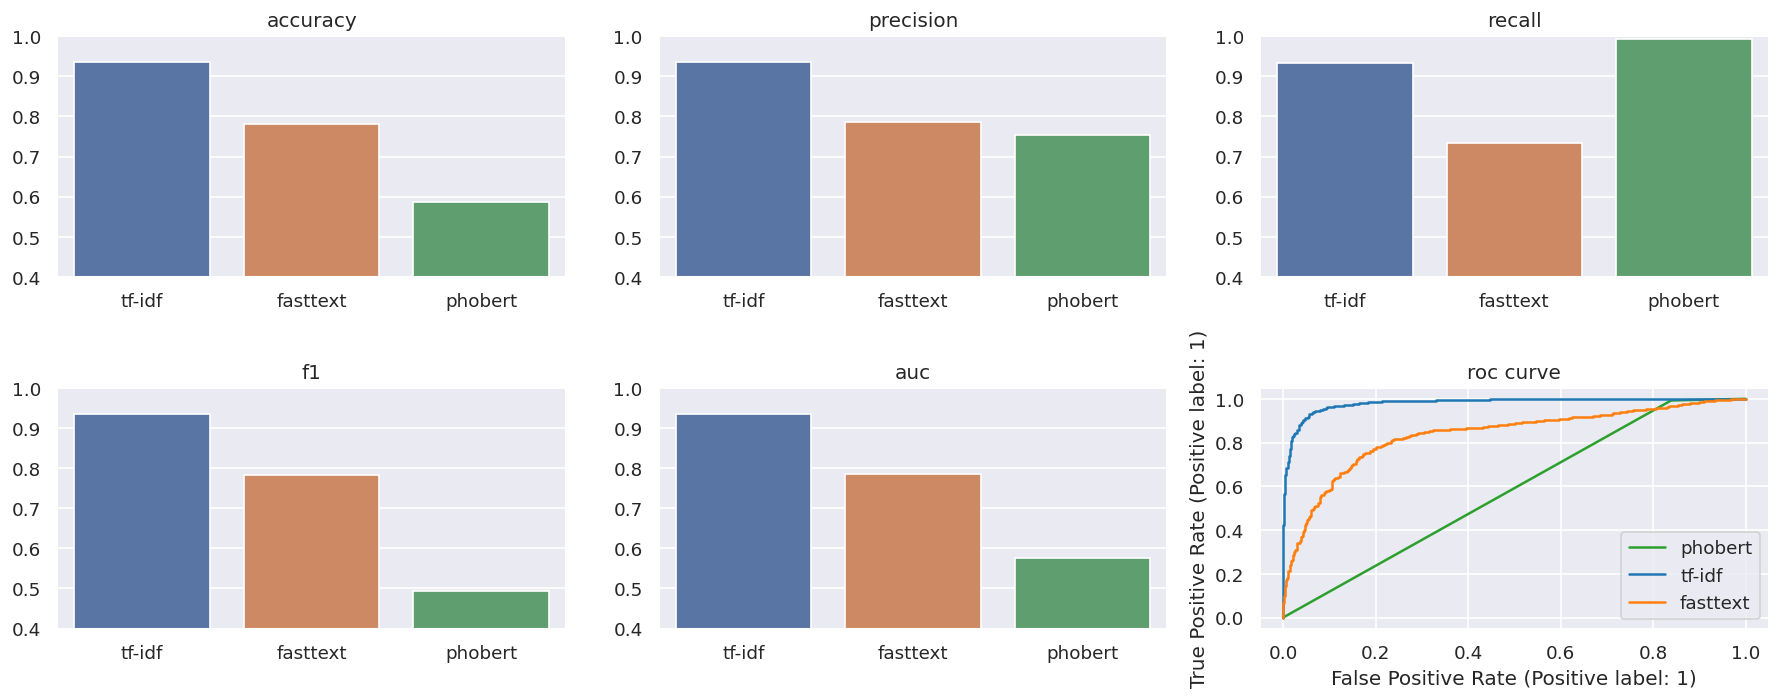

In [50]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 6))
axes = np.ravel(axes)
plot_metrics("accuracy", axes[0])
plot_metrics("precision", axes[1])
plot_metrics("recall", axes[2])
plot_metrics("f1", axes[3])
plot_metrics("auc", axes[4])

RocCurveDisplay.from_predictions(y, y_pred, ax=axes[5], label="phobert", color="tab:green")
metrics["roc"]["tf-idf"].plot(ax=axes[5], label="tf-idf", color="tab:blue")
metrics["roc"]["fasttext"].plot(ax=axes[5], label="fasttext", color="tab:orange")
axes[5].set_title("roc curve")

plt.tight_layout()

In [46]:
y.shape

(6466,)